In [511]:
# frame work
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import seaborn as sns


Pandas: разбор задач с собеседований

In [512]:
# В современном анализе данных умение эффективно обрабатывать и визуализировать информацию играет ключевую роль в принятии правильных бизнес-решений. 
# Особенно это актуально при работе с временными рядами, продажами и потребительским поведением. 
# В данной статье мы рассмотрим три практические задачи, которые часто встречаются в реальных проектах анализа данных:

# Создание сводной таблицы для суммирования продаж по продуктам и месяцам с учетом регионов и категорий.
# Добавление столбцов со скользящими средними и экспоненциальным скользящим средним для выявления трендов во временных рядах.
# Частотный анализ с помощью crosstab для оценки распределения продуктов по месяцам и регионам, а также подсчет уникальных покупателей.
# Разбор этих задач позволит понять, как использовать инструменты библиотеки pandas для эффективной агрегации, анализа и визуализации данных, что существенно облегчает работу аналитика и помогает принимать обоснованные решения, 
# а также подготовит вас к прохождению собеседования.

Задача 1: Анализ продаж с учетом регионов и категорий продуктов

In [513]:
# Условие:
# Дан DataFrame с данными о продажах продуктов по месяцам, регионам и категориям продуктов. Необходимо построить сводную таблицу, где:

# строки - категории продуктов,
# столбцы - месяцы,
# в ячейках - сумма продаж по всем продуктам данной категории в каждом месяце,
# при этом нужно дополнительно разбить данные по регионам (вложенные столбцы для каждого региона),
# а также вычислить итоговые суммы по строкам и столбцам.

In [514]:
data = {
    'product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'category': ['Electronics', 'Electronics', 'Furniture', 'Electronics', 'Electronics', 'Furniture', 'Electronics', 'Electronics', 'Furniture', 'Electronics', 'Electronics', 'Furniture'],
    'month': ['Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr', 'Apr'],
    'region': ['North', 'North', 'North', 'South', 'South', 'South', 'North', 'North', 'North', 'South', 'South', 'South'],
    'sales': [200, 150, 300, 220, 180, 320, 210, 160, 310, 230, 190, 330]
}

df_1 = pd.DataFrame(data)
df_1

,product,category,month,region,sales
0,A,Electronics,Jan,North,200
1,B,Electronics,Jan,North,150
2,C,Furniture,Jan,North,300
3,A,Electronics,Feb,South,220
4,B,Electronics,Feb,South,180
5,C,Furniture,Feb,South,320
6,A,Electronics,Mar,North,210
7,B,Electronics,Mar,North,160
8,C,Furniture,Mar,North,310
9,A,Electronics,Apr,South,230


Решение:

Создаем сводную таблицу с многоуровневыми столбцами (месяц и регион)

In [515]:
pivot_table_1 = pd.pivot_table(
    df_1,
    values='sales',
    index='category',
    columns=['month', 'region'],
    aggfunc='sum',
    fill_value=0,
    margins=True,          # Добавляет итоговые суммы по строкам и столбцам
    margins_name='Total'   # Имя для итоговых сумм
)

print(pivot_table_1)

month         Apr   Feb   Jan   Mar Total
region      South South North North      
category                                 
Electronics   420   400   350   370  1540
Furniture     330   320   300   310  1260
Total         750   720   650   680  2800


C:\Users\Alex\AppData\Local\Temp\ipykernel_8536\2772668463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pivot_table_1, x='category', y='Total',palette='viridis')


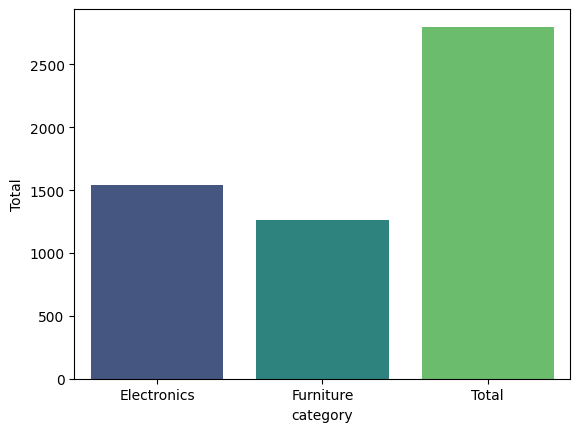

<Figure size 640x480 with 0 Axes>

In [516]:
ax = sns.barplot(data=pivot_table_1, x='category', y='Total',palette='viridis')
plt.show()
sns.despine()

In [517]:
pivot_table_2 = pd.pivot_table(
    df_1,
    values='sales',
    index='product',
    columns=['month', 'region'],
    aggfunc='sum',
    fill_value=0,
    margins=True,          # Добавляет итоговые суммы по строкам и столбцам
    margins_name='Total'   # Имя для итоговых сумм
)

print(pivot_table_2)

month     Apr   Feb   Jan   Mar Total
region  South South North North      
product                              
A         230   220   200   210   860
B         190   180   150   160   680
C         330   320   300   310  1260
Total     750   720   650   680  2800


C:\Users\Alex\AppData\Local\Temp\ipykernel_8536\1119907343.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pivot_table_2, x='product', y='Total',palette='viridis')


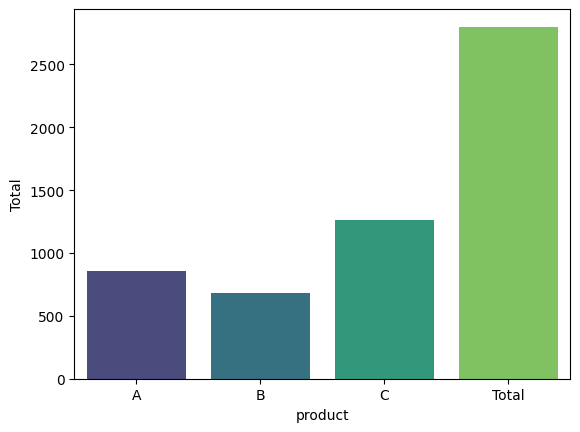

<Figure size 640x480 with 0 Axes>

In [518]:
ax = sns.barplot(data=pivot_table_2, x='product', y='Total',palette='viridis')
plt.show()
sns.despine()

In [519]:
pivot_table_2 = pd.pivot_table(
    df_1,
    values='sales',
    index='product',
    columns=['month', 'region'],
    aggfunc='mean',
    fill_value=0,
    margins=True,          # Добавляет итоговые суммы по строкам и столбцам
    margins_name='Mean'   # Имя для итоговых сумм
)

print(pivot_table_2)

month      Apr    Feb         Jan         Mar        Mean
region   South  South       North       North            
product                                                  
A        230.0  220.0  200.000000  210.000000  215.000000
B        190.0  180.0  150.000000  160.000000  170.000000
C        330.0  320.0  300.000000  310.000000  315.000000
Mean     250.0  240.0  216.666667  226.666667  233.333333


C:\Users\Alex\AppData\Local\Temp\ipykernel_8536\1930589896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=pivot_table_2, x='product', y='Mean',palette='viridis')


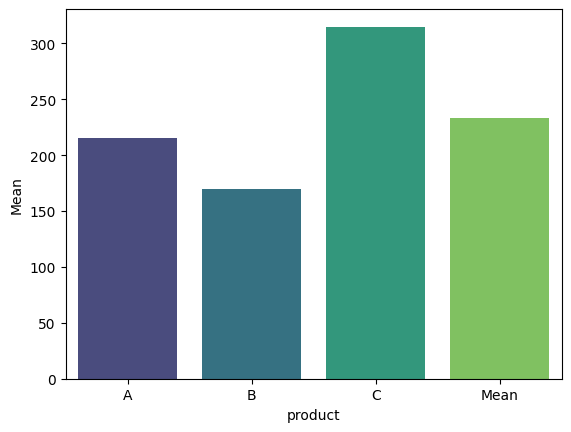

<Figure size 640x480 with 0 Axes>

In [520]:
ax = sns.barplot(data=pivot_table_2, x='product', y='Mean',palette='viridis')
plt.show()
sns.despine()

Подробный разбор решения.

In [521]:
# Исходные данные содержат информацию о продажах продуктов с указанием категории, месяца, региона и суммы продаж.

# Цель - агрегировать данные по категориям продуктов (строки), месяцам и регионам (столбцы), чтобы видеть сумму продаж для каждой комбинации.

# Используем pd.pivot_table:

# values='sales' - агрегируем по сумме продаж.
# index='category' - строки - категории продуктов.
# columns=['month', 'region'] - многомерные столбцы: сначала месяц, затем регион.
# aggfunc='sum' - суммируем продажи.
# fill_value=0 - заменяем пропуски на 0.
# margins=True - добавляем итоговые суммы по строкам и столбцам.
# margins_name='Total' - задаем имя для итоговой строки и столбца.
# В результате получаем сводную таблицу с многоуровневыми столбцами и итогами, что позволяет детально анализировать продажи по категориям, месяцам и регионам.

# Такой подход позволяет не только агрегировать данные по двум измерениям (продукт и месяц), но и добавить дополнительное измерение (регион), а также получить итоги по всем категориям и месяцам. Это значительно расширяет возможности анализа и делает отчет более информативным.

Задача 2: Добавление нескольких столбцов со скользящими средними и экспоненциальным скользящим средним.

In [522]:
# Условие:
# Дан DataFrame с временным рядом ежедневных значений. Нужно:

# Добавить столбец со скользящим средним по окну из 3 дней.
# Добавить столбец со скользящим средним по окну из 7 дней.
# Добавить столбец с экспоненциальным скользящим средним (EMA) с параметром сглаживания 0.3.
# Обработать пропуски в начале ряда (там, где окно не заполнено), заполнив их значениями из доступных данных.

In [523]:
# Создаем пример временного ряда с датами и значениями
dates = pd.date_range(start='2025-04-01', periods=10, freq='D')
values = [10, 12, 11, 13, 15, 14, 16, 18, 17, 19]

df_2 = pd.DataFrame({'date': dates, 'value': values})
df_2.set_index('date', inplace=True)

print(df_2)

            value
date             
2025-04-01     10
2025-04-02     12
2025-04-03     11
2025-04-04     13
2025-04-05     15
2025-04-06     14
2025-04-07     16
2025-04-08     18
2025-04-09     17
2025-04-10     19


Решение:

In [524]:
# 1. Скользящее среднее по окну 3 дня
df_2['rolling_mean_3'] = df_2['value'].rolling(window=3, min_periods=1).mean()

# 2. Скользящее среднее по окну 7 дней
df_2['rolling_mean_7'] = df_2['value'].rolling(window=7, min_periods=1).mean()

# 3. Экспоненциальное скользящее среднее (EMA) с параметром сглаживания 0.3
df_2['ema_0.3'] = df_2['value'].ewm(alpha=0.3, adjust=False).mean()

print(df_2)

            value  rolling_mean_3  rolling_mean_7    ema_0.3
date                                                        
2025-04-01     10            10.0       10.000000  10.000000
2025-04-02     12            11.0       11.000000  10.600000
2025-04-03     11            11.0       11.000000  10.720000
2025-04-04     13            12.0       11.500000  11.404000
2025-04-05     15            13.0       12.200000  12.482800
2025-04-06     14            14.0       12.500000  12.937960
2025-04-07     16            15.0       13.000000  13.856572
2025-04-08     18            16.0       14.142857  15.099600
2025-04-09     17            17.0       14.857143  15.669720
2025-04-10     19            18.0       16.000000  16.668804


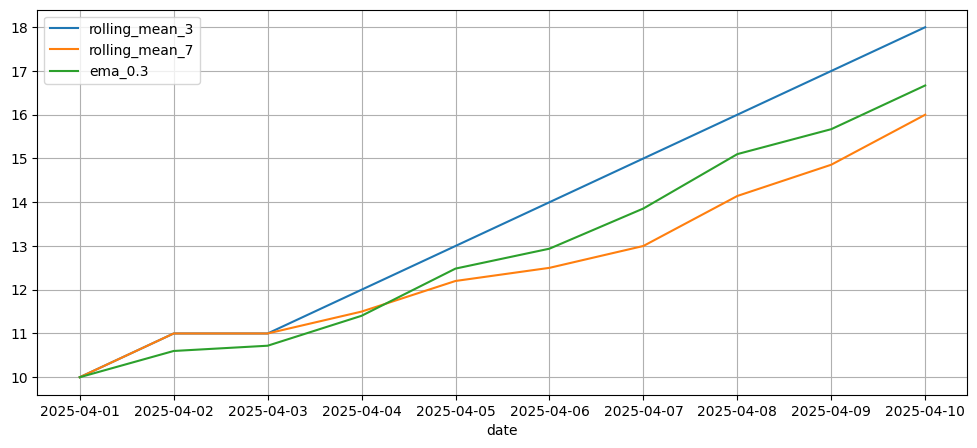

In [525]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_2.drop('value',axis=1),dashes=False)
plt.grid()

In [526]:
# Подробный разбор решения
# rolling(window=3, min_periods=1).mean()

# Метод .rolling() создает скользящее окно заданного размера (3 дня).
# Параметр min_periods=1 означает, что для расчета среднего достаточно хотя бы одного значения, что позволяет заполнить первые строки, где окно не полностью заполнено.
# .mean() вычисляет среднее значение в этом окне.
# Аналогично для окна из 7 дней - более длинное окно сглаживает данные сильнее.

# Экспоненциальное скользящее среднее (EMA)

# Метод .ewm() создает экспоненциально взвешенное окно.
# Параметр alpha=0.3 задает степень сглаживания (чем выше alpha, тем больше вес последних наблюдений).
# adjust=False упрощает расчет EMA, делая его более классическим.
# Обработка пропусков в начале ряда

# Благодаря min_periods=1 в .rolling() первые значения не будут NaN, а будут усреднены по доступным данным. Это удобно для временных рядов с небольшим количеством данных.
# Добавление нескольких скользящих средних с разными параметрами и EMA позволяет анализировать тренды и сглаживать шум в данных. Это полезно для прогнозирования, выявления аномалий и визуализации.

Задача 3: Частотный анализ продуктов по месяцам и регионам с подсчетом уникальных покупателей.

In [527]:
# Условие:
# Дан DataFrame с информацией о продажах, содержащий следующие столбцы:

# product - название продукта,
# month - месяц продажи,
# region - регион продажи,
# customer_id - уникальный идентификатор покупателя.
# Необходимо:

# Посчитать, сколько раз каждый продукт встречается в каждом месяце (частотный анализ).
# Разбить частоты по регионам (т.е. получить частоты по продуктам, месяцам и регионам).
# Для каждого продукта и месяца посчитать количество уникальных покупателей.
# Представить результаты в виде сводных таблиц.

In [528]:
data = {
    'product': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A'],
    'month': ['Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr', 'Apr', 'Apr'],
    'region': ['North', 'North', 'South', 'South', 'South', 'North', 'North', 'North', 'South', 'South', 'South', 'South'],
    'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
}

df_3 = pd.DataFrame(data)
df_3

,product,month,region,customer_id
0,A,Jan,North,101
1,B,Jan,North,102
2,A,Feb,South,103
3,C,Feb,South,104
4,B,Feb,South,105
5,A,Mar,North,106
6,C,Mar,North,107
7,B,Mar,North,108
8,A,Apr,South,109
9,C,Apr,South,110


Решение:

1. Частотный анализ: сколько раз каждый продукт встречается в каждом месяце.

In [529]:
freq_product_month = pd.crosstab(df_3['product'], df_3['month'])
print("Частоты продуктов по месяцам:")
print(freq_product_month)

Частоты продуктов по месяцам:
month    Apr  Feb  Jan  Mar
product                    
A          2    1    1    1
B          1    1    1    1
C          1    1    0    1


2. Частотный анализ с разбивкой по регионам

In [530]:
freq_product_month_region = pd.crosstab(
    [df_3['product'], df_3['month']],
    df_3['region']
)
print("\nЧастоты продуктов по месяцам и регионам:")
print(freq_product_month_region)


Частоты продуктов по месяцам и регионам:
region         North  South
product month              
A       Apr        0      2
        Feb        0      1
        Jan        1      0
        Mar        1      0
B       Apr        0      1
        Feb        0      1
        Jan        1      0
        Mar        1      0
C       Apr        0      1
        Feb        0      1
        Mar        1      0


3. Подсчет количества уникальных покупателей для каждого продукта и месяца

In [541]:
unique_customers = df_3.groupby(['product', 'month'])['customer_id'].nunique().unstack(fill_value=0)
print("\nКоличество уникальных покупателей по продуктам и месяцам:")
print(unique_customers)


Количество уникальных покупателей по продуктам и месяцам:
month    Apr  Feb  Jan  Mar
product                    
A          2    1    1    1
B          1    1    1    1
C          1    1    0    1


In [542]:
# Подробный разбор решения

# pd.crosstab(df['product'], df['month'])
# Создает таблицу частот, где строки - продукты, столбцы - месяцы, а значения - количество появлений продукта в каждом месяце.

# pd.crosstab([df['product'], df['month']], df['region'])
# Создает более детальную таблицу, где индекс - комбинация продукта и месяца, а столбцы - регионы. Значения - количество продаж в каждом регионе.

# groupby(['product', 'month'])['customer_id'].nunique()
# Группирует данные по продуктам и месяцам и считает количество уникальных покупателей (customer_id) для каждой группы.
# .unstack(fill_value=0) преобразует результат в таблицу с продуктами по строкам и месяцами по столбцам, заполняя отсутствующие значения нулями.
# Такой подход позволяет не только посчитать частоты продаж продуктов по месяцам, но и получить более глубокий анализ с учетом регионов и уникальных покупателей. Это полезно для маркетингового анализа, оценки охвата клиентов и планирования продаж.